In [105]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import ExtendedBinnedNLL, LeastSquares
from scipy.stats import norm

E = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9]
errEn = 1/100
sigma=7

N=np.array([5.5, 5.5, 5, 5, 4, 4, 3, 5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 4])*100


for l in range(len(E)):
    print(E[l])
    raw_data = np.loadtxt(r"C:\Users\lenovo\Desktop\AlfaRuth24-25_S1\curva_calibrazione\50mm2\curva_cal_50mm2_13-11-24_" +str(E[l]) +"MeV.dat")

    data1 = []

    for i in range(len(raw_data)):
        for j in range(int(raw_data[i])):
            data1.append(i)

    data = np.array(data1)

    signal = []


    for i in range(len(data)):
        if data[i] > np.array(raw_data).argmax()-50 and data[i] <np.array(raw_data).argmax()+50 : signal.append(data[i])

    N_ext=sum(raw_data)

    def model(x, N1, mu1, sigma1):
    	return N1*norm.cdf(x, loc = mu1, scale = sigma1)


    #bin_content, bin_edges,_ = plt.hist(signal, bins = 10)
    numbins=[]
    chi2=[]
    
    c = int(np.ceil(1 + np.log(len(signal)/np.log(2))))
    
    for nbins in range(20, 500):
       
        bin_content, bin_edges = np.histogram(signal, bins = nbins)
        N_events = sum(bin_content)
    
        costf = ExtendedBinnedNLL(bin_content, bin_edges, model)
    
        my_minuit = Minuit(costf, N1 = N_ext,  mu1 = np.array(raw_data).argmax(), sigma1 = sigma)
        my_minuit.migrad()
        
        
        #print(my_minuit.valid, my_minuit.fmin.reduced_chi2)
        if ((my_minuit.valid == True) and (my_minuit.fval/my_minuit.ndof > 0 )):
            chi2.append(my_minuit.fval/my_minuit.ndof)
            numbins.append(nbins)
            #display(my_minuit)

    
    index = np.array(chi2).argmin() #dove c'è il fit migliore


    
    nbins = numbins[index]
    
    bin_content, bin_edges = np.histogram(signal, bins = nbins)
    
    N_events = sum(bin_content)
    
    costf = ExtendedBinnedNLL(bin_content, bin_edges, model)
    
    my_minuit = Minuit(costf, N1 = N_ext, mu1 = np.array(raw_data).argmax(), sigma1 = sigma)
    
    my_minuit.migrad()
    display(my_minuit)
    print(nbins)

    
    ch1 = my_minuit.values['mu1']
    err_ch1 = my_minuit.errors['mu1']
    
    
    #salva i dati che ci interessano in myfile.txt
    with open("calibrazione_50mm2", "a") as f:
        f.write(f"{E[l]} {errEn} {ch1} {err_ch1} {my_minuit.fmin.reduced_chi2:.1f}")
        f.write("\n")
        f.close()
    
   

1


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 21.01 (χ²/ndof = 0.8)      │              Nfcn = 62               │
│ EDM = 6.96e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.06e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │  950.03   │   0.05    │            │            │         │         │       │
│ 2 │ sigma1 │   3.447   │   0.035   │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.06e+03  -0.0007   0.0029 │
│    mu1 │  -0.0007  0.00237  -0.0000 │
│ sigma1 │   0.0029  -0.0000  0.00121 │
└────────┴────────────────────────────┘

28
1.5


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 42.51 (χ²/ndof = 1.5)      │              Nfcn = 61               │
│ EDM = 2.07e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 1.39418e3 │ 0.00005e3 │            │            │         │         │       │
│ 2 │ sigma1 │   3.502   │   0.035   │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03  -0.0003   0.0009 │
│    mu1 │  -0.0003  0.00244  -0.0000 │
│ sigma1 │   0.0009  -0.0000  0.00123 │
└────────┴────────────────────────────┘

31
2


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 145.4 (χ²/ndof = 4.2)      │              Nfcn = 61               │
│ EDM = 4.39e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 1.84799e3 │ 0.00006e3 │            │            │         │         │       │
│ 2 │ sigma1 │   3.94    │   0.04    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03   0.0000   0.0001 │
│    mu1 │   0.0000  0.00309   0.0000 │
│ sigma1 │   0.0001   0.0000  0.00155 │
└────────┴────────────────────────────┘

38
2.5


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 84.73 (χ²/ndof = 2.4)      │              Nfcn = 63               │
│ EDM = 2.52e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 2.28417e3 │ 0.00006e3 │            │            │         │         │       │
│ 2 │ sigma1 │   3.95    │   0.04    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03   0.0000   0.0001 │
│    mu1 │   0.0000  0.00309   0.0000 │
│ sigma1 │   0.0001   0.0000  0.00156 │
└────────┴────────────────────────────┘

39
3


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 621.7 (χ²/ndof = 13.0)     │              Nfcn = 61               │
│ EDM = 2.85e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 2.73767e3 │ 0.00007e3 │            │            │         │         │       │
│ 2 │ sigma1 │   5.10    │   0.05    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03    0.000   0.0012 │
│    mu1 │    0.000  0.00516   0.0000 │
│ sigma1 │   0.0012   0.0000  0.00261 │
└────────┴────────────────────────────┘

51
3.5


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 370 (χ²/ndof = 8.8)        │              Nfcn = 209              │
│ EDM = 3.25e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 3.17523e3 │ 0.00007e3 │            │            │         │         │       │
│ 2 │ sigma1 │   4.96    │   0.05    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03    0.000   0.0001 │
│    mu1 │    0.000  0.00486   0.0000 │
│ sigma1 │   0.0001   0.0000  0.00244 │
└────────┴────────────────────────────┘

45
4


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 962.6 (χ²/ndof = 19.3)     │              Nfcn = 44               │
│ EDM = 8.05e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 3.62449e3 │ 0.00010e3 │            │            │         │         │       │
│ 2 │ sigma1 │   6.89    │   0.07    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03    0.000    0.003 │
│    mu1 │    0.000  0.00939    0.000 │
│ sigma1 │    0.003    0.000  0.00473 │
└────────┴────────────────────────────┘

53
4.5


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 727.5 (χ²/ndof = 14.0)     │              Nfcn = 55               │
│ EDM = 8.06e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 4.06613e3 │ 0.00007e3 │            │            │         │         │       │
│ 2 │ sigma1 │   5.15    │   0.05    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.08e+03   -0.001  -0.0012 │
│    mu1 │   -0.001  0.00534   0.0001 │
│ sigma1 │  -0.0012   0.0001  0.00268 │
└────────┴────────────────────────────┘

55
5


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2037 (χ²/ndof = 33.9)      │              Nfcn = 52               │
│ EDM = 5.5e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 4.50849e3 │ 0.00011e3 │            │            │         │         │       │
│ 2 │ sigma1 │   8.05    │   0.08    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03    0.000    0.003 │
│    mu1 │    0.000   0.0128    0.000 │
│ sigma1 │    0.003    0.000  0.00646 │
└────────┴────────────────────────────┘

63
5.5


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2233 (χ²/ndof = 37.2)      │              Nfcn = 52               │
│ EDM = 6.28e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 4.95052e3 │ 0.00011e3 │            │            │         │         │       │
│ 2 │ sigma1 │   8.06    │   0.08    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03   -0.001    0.004 │
│    mu1 │   -0.001   0.0128   -0.000 │
│ sigma1 │    0.004   -0.000  0.00648 │
└────────┴────────────────────────────┘

63
6


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2752 (χ²/ndof = 48.3)      │              Nfcn = 64               │
│ EDM = 4.91e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 5.39305e3 │ 0.00012e3 │            │            │         │         │       │
│ 2 │ sigma1 │   8.15    │   0.08    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03   -0.001    0.007 │
│    mu1 │   -0.001   0.0131   -0.000 │
│ sigma1 │    0.007   -0.000  0.00666 │
└────────┴────────────────────────────┘

60
6.5


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1994 (χ²/ndof = 32.7)      │              Nfcn = 52               │
│ EDM = 2.42e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 5.83635e3 │ 0.00011e3 │            │            │         │         │       │
│ 2 │ sigma1 │   7.79    │   0.08    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03   -0.002    0.003 │
│    mu1 │   -0.002    0.012   -0.000 │
│ sigma1 │    0.003   -0.000  0.00605 │
└────────┴────────────────────────────┘

64
7


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1923 (χ²/ndof = 35.0)      │              Nfcn = 50               │
│ EDM = 5.03e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 6.29087e3 │ 0.00011e3 │            │            │         │         │       │
│ 2 │ sigma1 │   7.80    │   0.08    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03    0.001    0.006 │
│    mu1 │    0.001    0.012    0.000 │
│ sigma1 │    0.006    0.000  0.00609 │
└────────┴────────────────────────────┘

58
7.5


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2069 (χ²/ndof = 36.3)      │              Nfcn = 62               │
│ EDM = 3.54e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 6.73312e3 │ 0.00011e3 │            │            │         │         │       │
│ 2 │ sigma1 │   7.96    │   0.08    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03   -0.000    0.005 │
│    mu1 │   -0.000   0.0125   -0.000 │
│ sigma1 │    0.005   -0.000  0.00633 │
└────────┴────────────────────────────┘

60
8


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1668 (χ²/ndof = 30.9)      │              Nfcn = 52               │
│ EDM = 1.03e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 7.17572e3 │ 0.00011e3 │            │            │         │         │       │
│ 2 │ sigma1 │   7.75    │   0.08    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03   -0.000    0.007 │
│    mu1 │   -0.000   0.0119   -0.000 │
│ sigma1 │    0.007   -0.000  0.00603 │
└────────┴────────────────────────────┘

57
8.5


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2341 (χ²/ndof = 41.8)      │              Nfcn = 52               │
│ EDM = 3.96e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 7.61727e3 │ 0.00011e3 │            │            │         │         │       │
│ 2 │ sigma1 │   7.91    │   0.08    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03    0.000    0.006 │
│    mu1 │    0.000   0.0124    0.000 │
│ sigma1 │    0.006    0.000  0.00626 │
└────────┴────────────────────────────┘

59
9


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 599.2 (χ²/ndof = 14.6)     │              Nfcn = 65               │
│ EDM = 0.000103 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 8.05965e3 │ 0.00007e3 │            │            │         │         │       │
│ 2 │ sigma1 │   5.10    │   0.05    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────┐
│        │      N1     mu1  sigma1 │
├────────┼─────────────────────────┤
│     N1 │ 5.2e+03   0.009  0.0404 │
│    mu1 │   0.009 0.00521 -0.0001 │
│ sigma1 │  0.0404 -0.0001 0.00271 │
└────────┴─────────────────────────┘

44


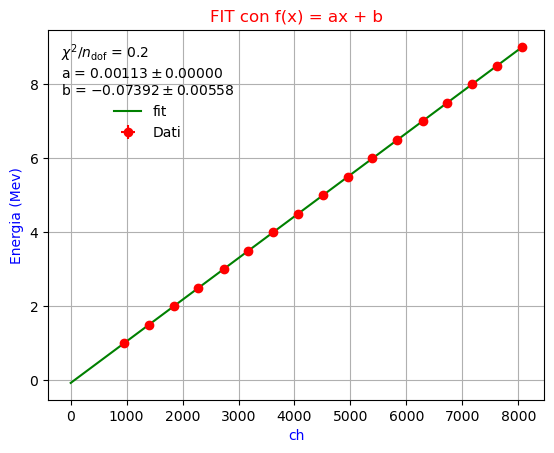

In [100]:

data = np.loadtxt("calibrazione_50mm2")
En = data[:,0] #in Mev
ErrEn = 1/100
ch = data[:,2]
errch = data[:,3]

func = lambda x, a, b: a*x + b

least_squares = LeastSquares (ch, En, errEn, func)
m = Minuit (least_squares, a=0, b=0) 

m.migrad ()  
m.hesse ()

#display(m)

plt.errorbar(ch, En, yerr=ErrEn, xerr=errch, linestyle="None", marker="o", color="red", label="Dati")
x=np.linspace(0, 8000, 100)
plt.plot(x, func(x, m.values[0], m.values[1]), color="green", label="fit")

plt.grid("on")
plt.ylabel("Energia (Mev)", color="blue")
plt.xlabel("ch", color="blue")

fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m.fmin.reduced_chi2:.1f}",
]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.5f} \\pm {e:.5f}$")

plt.legend(title="\n".join(fit_info), frameon=False)
plt.title(f"FIT con f(x) = ax + b", color="red")
plt.show()
